# Loan Default Exploratory Data Analysis
## by Albert Hunduza

### 1) Importing dependencies

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 2) Loading Dataset

In [2]:
# reading the data
loan_data = pd.read_csv('loans50k.csv', encoding='latin1')
loan_data.head()

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [3]:
# checking the shape of the data
loan_data.shape

(50000, 32)

### 3) Pre-processing the Dataset

* in this section, we look at the quality of the data and check for missing values

In [4]:
# checking the data types of the variables
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

In [5]:
# checking the dataset for missing values
loan_data.isnull().sum()

loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64

* we will take a closer look at the instances with missing values to see how we can address them

In [6]:
# find the row where Amount column is null
loan_data[loan_data['amount'].isnull()]

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
34805,656728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* we can see that there's one column with most of the attributes missing. It therefore makes sense to just drop it

In [7]:
# drop the row where amount column is null
loan_data.drop(loan_data[loan_data['amount'].isnull()].index, inplace=True)

In [8]:
# find the row where the employment column is null
loan_data[loan_data['employment'].isnull()]

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
41,272229,20800.0,36 months,0.17,736.93,D,NaN,NaN,MORTGAGE,75000.0,...,163717.0,24300.0,3.0,13643.0,610.0,90.8,342467.0,43467.0,6600.0,48617.0
51,290384,15625.0,36 months,0.13,523.39,C,NaN,NaN,MORTGAGE,34000.0,...,110268.0,30600.0,2.0,9189.0,5186.0,75.8,137586.0,28003.0,21400.0,18636.0
105,584627,30000.0,60 months,0.13,677.85,C,NaN,NaN,MORTGAGE,334000.0,...,972277.0,1058000.0,1.0,81023.0,10624.0,34.0,1124474.0,972277.0,16100.0,0.0
148,161338,17550.0,60 months,0.14,412.83,C,NaN,NaN,MORTGAGE,44146.0,...,31423.0,25800.0,1.0,3928.0,955.0,95.3,37562.0,31423.0,20300.0,11762.0
150,556421,5400.0,36 months,0.12,178.15,B,NaN,NaN,RENT,28800.0,...,5934.0,12700.0,4.0,659.0,4711.0,37.2,16039.0,5934.0,7500.0,3339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,400200,4125.0,36 months,0.22,157.52,F,NaN,NaN,RENT,13776.0,...,6459.0,9400.0,2.0,1292.0,941.0,87.3,9400.0,6459.0,7400.0,0.0
49933,459040,18000.0,60 months,0.18,455.72,D,NaN,NaN,MORTGAGE,50000.0,...,136401.0,15700.0,5.0,10492.0,3686.0,66.2,146142.0,15346.0,10900.0,8649.0
49956,624458,6400.0,36 months,0.16,223.72,D,NaN,NaN,MORTGAGE,60000.0,...,39083.0,25000.0,5.0,4885.0,6423.0,51.7,62020.0,39083.0,13300.0,37020.0
49996,426438,26050.0,60 months,0.22,719.33,F,NaN,NaN,MORTGAGE,56677.0,...,257712.0,34300.0,10.0,19824.0,1541.0,88.3,282755.0,34757.0,13200.0,21215.0


In [9]:
# calculate the percentage of missing values in employment column
print('Percentage of missing values in employment column: ', loan_data['employment'].isnull().sum() / loan_data.shape[0] * 100,'%')
# calculate the percentage of missing values in length column
print('Percentage of missing values in length column: ', loan_data['length'].isnull().sum() / loan_data.shape[0] * 100, '%')
# calculate the percentage of missing values in  revolRatio column
print('Percentage of missing values in revolRatio column: ', loan_data['revolRatio'].isnull().sum() / loan_data.shape[0] * 100, '%')
# calculate the percentage of missing values in bcOpen column
print('Percentage of missing values in bcOpen column: ', loan_data['bcOpen'].isnull().sum() / loan_data.shape[0] * 100,'%')
# calculate the percentage of missing values in bcRatio column
print('Percentage of missing values in bcRatio column: ', loan_data['bcRatio'].isnull().sum() / loan_data.shape[0] * 100,'%')


Percentage of missing values in employment column:  5.568111362227245 %
Percentage of missing values in length column:  5.360107202144042 %
Percentage of missing values in revolRatio column:  0.03600072001440029 %
Percentage of missing values in bcOpen column:  0.9760195203904078 %
Percentage of missing values in bcRatio column:  1.0400208004160083 %


* since at most just 1% of values in the revolRatio, bcOpen and bcRatio columns are missing we can just drop the rows with missing values
    - at 5%, more significant amount of values is missing in the employement and length columns. We can just drop these during EDA and then use imputed values for the classification model

In [10]:
# dropp the rows where revolRatio or bcOpen or bcRatio or employment or length column is null
loan_data.drop(loan_data[loan_data['revolRatio'].isnull() | loan_data['bcOpen'].isnull()
                          | loan_data['bcRatio'].isnull() | loan_data['employment'].isnull()
                            | loan_data['length'].isnull()].index, inplace=True)

In [11]:
loan_data.isnull().sum()

loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
employment     0
length         0
home           0
income         0
verified       0
status         0
reason         0
state          0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64

* Next, we will drop the loanID column because it doesn't offer any useful information for the analysis or model

In [12]:
# dropping the Loan_ID column
loan_data.drop('loanID', axis=1, inplace=True)
loan_data.head()

,amount,term,rate,payment,grade,employment,length,home,income,verified,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,Source Verified,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,Not Verified,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,Verified,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,Source Verified,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,Source Verified,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [13]:
# calculating the percentage of original data retained after removing the missing values
print('Percentage of original data retained after removing the missing values: ', loan_data.shape[0] / 50000 * 100, '%')

Percentage of original data retained after removing the missing values:  93.428 %


* Now we have no missing values and can proceed to the exploratory analysis

In [14]:
# replace "Source Verified" with "Verified" in verified column
loan_data['verified'].replace('Source Verified', 'Verified', inplace=True)

### 4) Exploratory Analysis

* our approach will be to look at each important in isolation first and then relate it to other relevant columns

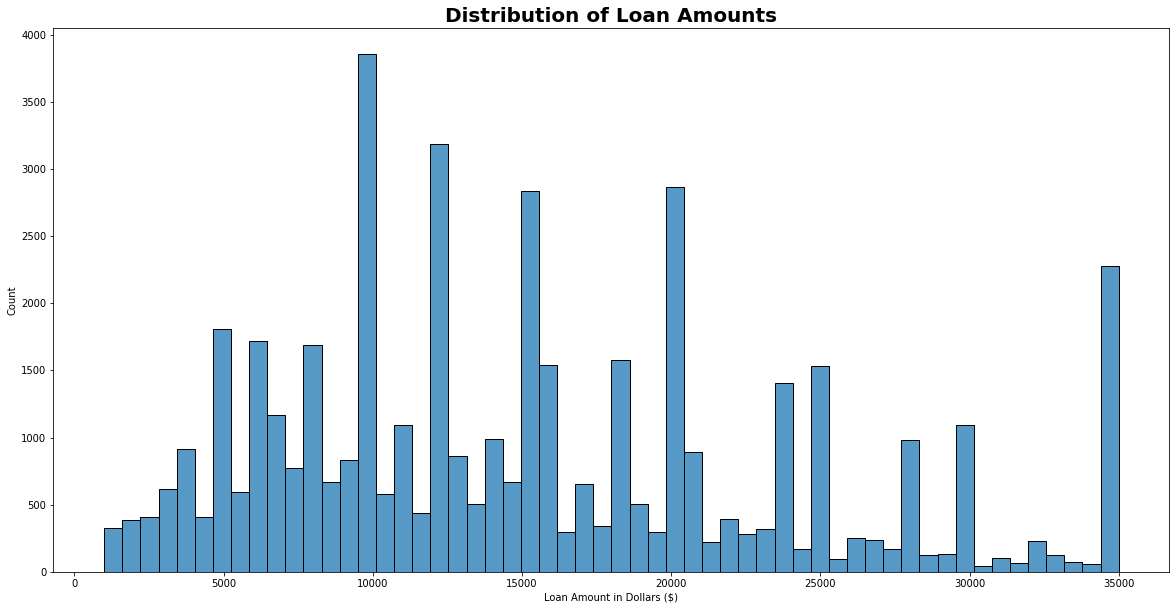

In [15]:
# Create a boxplot of the amount column.

# Set the figure size.
plt.figure(figsize=(20, 10))

sns.histplot(data=loan_data['amount'])

# Add a title and x, y labels.
plt.title('Distribution of Loan Amounts', fontsize=20, weight='bold')
plt.ylabel('Count')
plt.xlabel('Loan Amount in Dollars ($)')

# Show the plot.
plt.show();

In [16]:
# find the highest loan amount
print('Highest loan amount: ', loan_data['amount'].max())

# find the lowest loan amount
print('Lowest loan amount: ', loan_data['amount'].min())

# find the average loan amount
print('Average loan amount: ', loan_data['amount'].mean())

# find the median loan amount
print('Median loan amount: ', loan_data['amount'].median())

# find the mode of loan amount
print('Mode of loan amount: ', loan_data['amount'].mode())

Highest loan amount:  35000.0
Lowest loan amount:  1000.0
Average loan amount:  15342.429464400393
Median loan amount:  14000.0
Mode of loan amount:  0    10000.0
Name: amount, dtype: float64


In [17]:
loan_data['term'].value_counts()

 36 months    31188
 60 months    15526
Name: term, dtype: int64

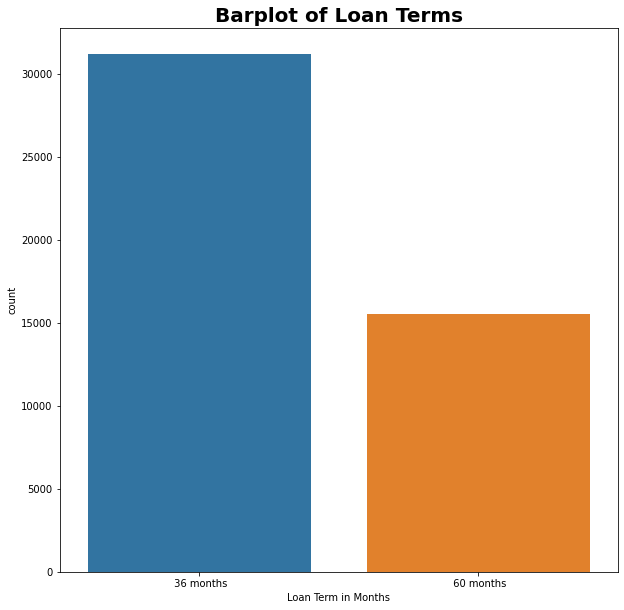

In [18]:
# create barplot of the term column
plt.figure(figsize=(10, 10))

sns.countplot(data=loan_data, x='term')

# Add a title and labels.
plt.title('Barplot of Loan Terms', fontsize=20, weight='bold')
plt.xlabel('Loan Term in Months')

# Show the plot.
plt.show();

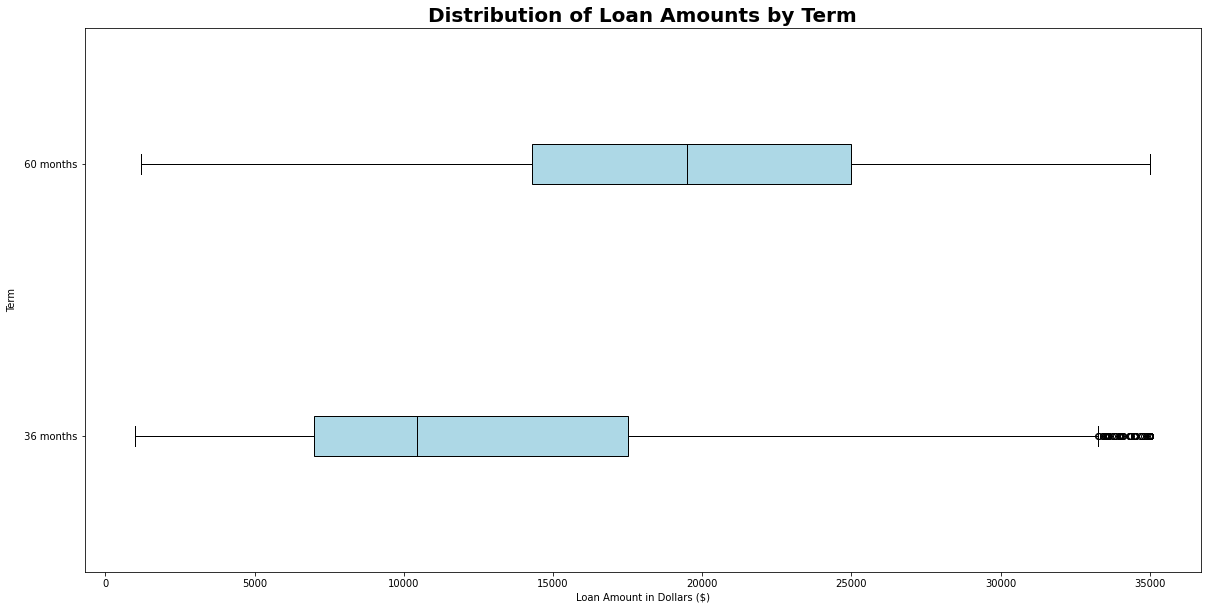

In [19]:
# create boxplots of the amount column for each term

# Set the figure size.
plt.figure(figsize=(20, 10))

# Group the data by 'term' column.
grouped_data = loan_data.groupby('term')['amount']

# Collect the data for each term.
data = [grouped_data.get_group(term) for term in grouped_data.groups.keys()]

# Create a boxplot for each term.
boxprops = dict(facecolor='lightblue')  # Set the fill color for the boxes
medianprops = dict(color='black')  # Set the color for the median line
plt.boxplot(data, vert=False, labels=grouped_data.groups.keys(), patch_artist=True,
            boxprops=boxprops, medianprops=medianprops)

# Add a title and labels.
plt.title('Distribution of Loan Amounts by Term', fontsize=20, weight='bold')
plt.xlabel('Loan Amount in Dollars ($)')
plt.ylabel('Term')

# Show the plot.
plt.show()


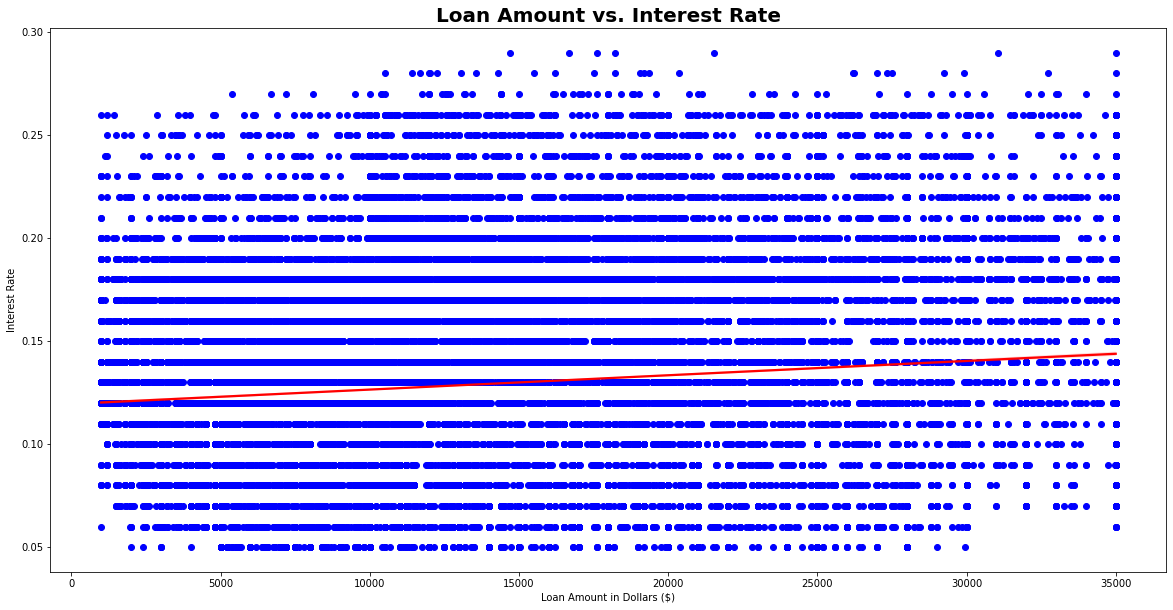

In [20]:
# Set the figure size.
plt.figure(figsize=(20, 10))

# Create a scatter plot.
plt.scatter(loan_data['amount'], loan_data['rate'], color='blue')

# Add a regression line.
sns.regplot(x='amount', y='rate', data=loan_data, scatter=False, color='red')

# Add a title and labels.
plt.title('Loan Amount vs. Interest Rate', fontsize=20, weight='bold')
plt.xlabel('Loan Amount in Dollars ($)')
plt.ylabel('Interest Rate')

# Show the plot.
plt.show()
